<a href="https://colab.research.google.com/github/tejas-54/Gold_price-_predictor/blob/main/GDG_ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gold Price Prediction Using Financial Indicators**

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprosessing

In [ ]:
data = pd.read_csv('/content/gold_price_data (1).csv')

In [ ]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [ ]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [ ]:
data.isna().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])


#  Visuvalization of various Parameters

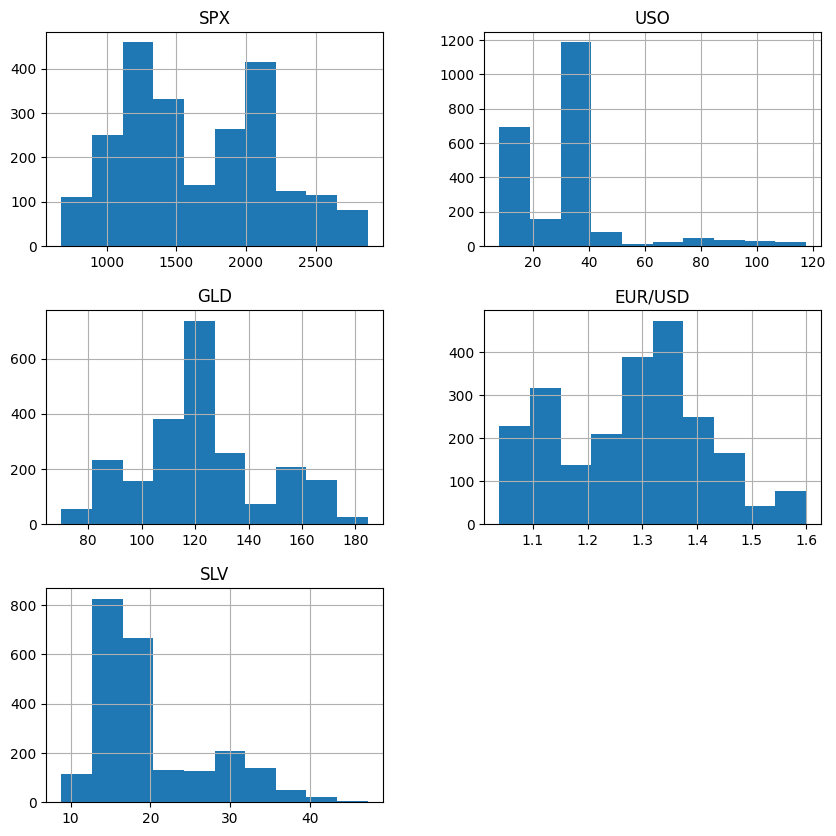

In [ ]:
data[['SPX',"USO","GLD",'EUR/USD','SLV']].hist(figsize = (10,10));

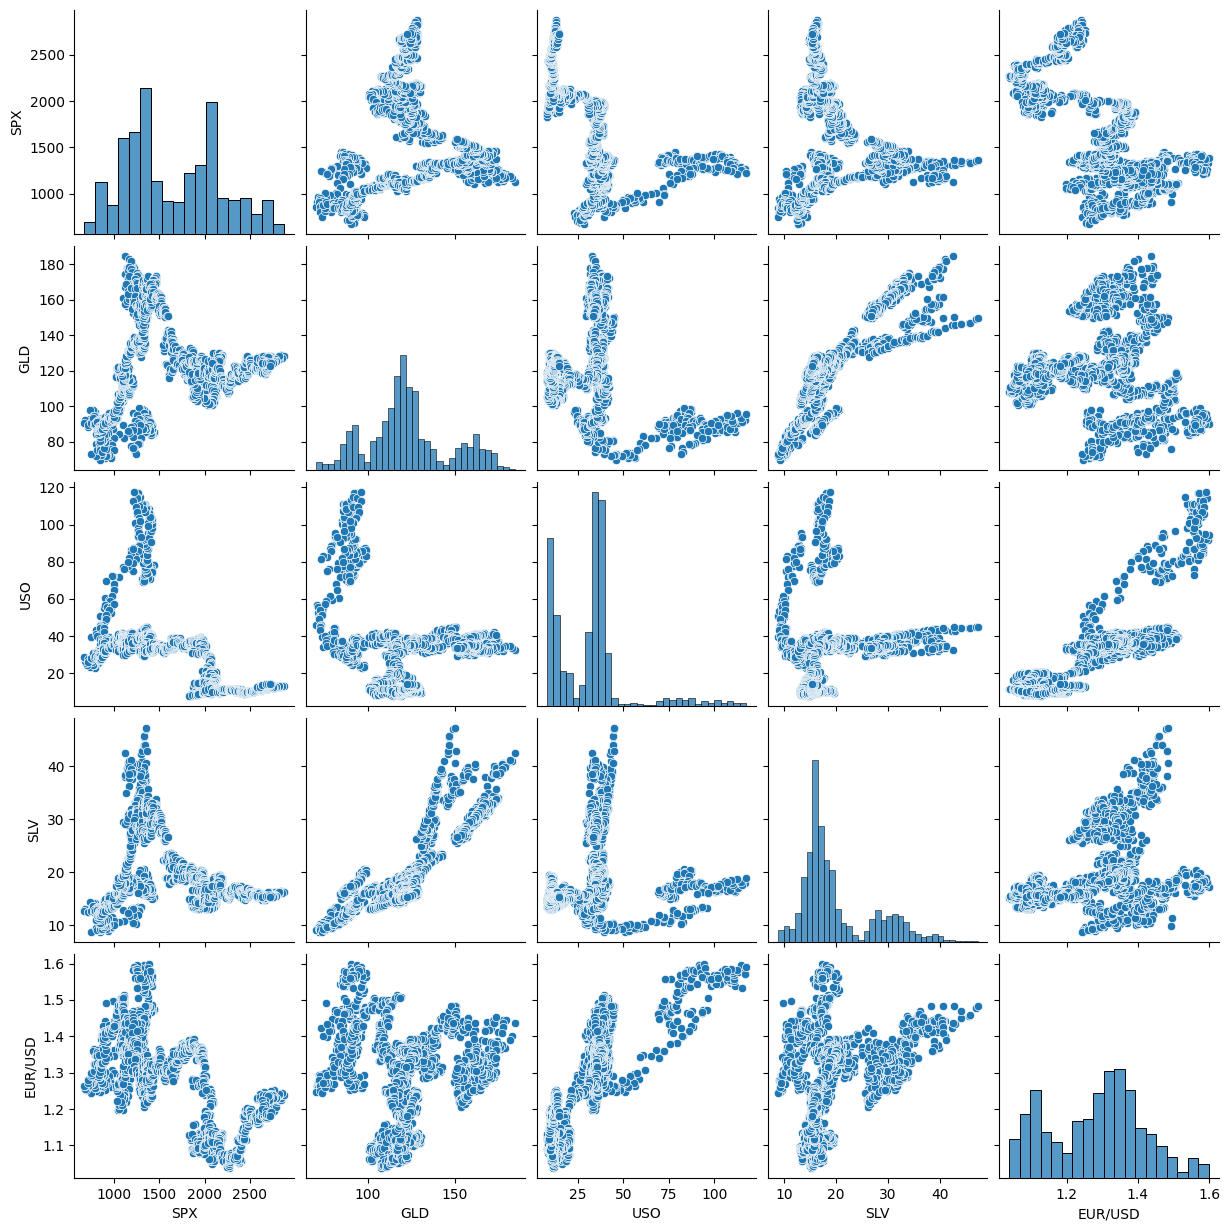

In [ ]:
sns.pairplot(data)



In [ ]:
data1=data.copy()
data1=data1.drop('Date',axis=1)
colll = data.select_dtypes(exclude='object')

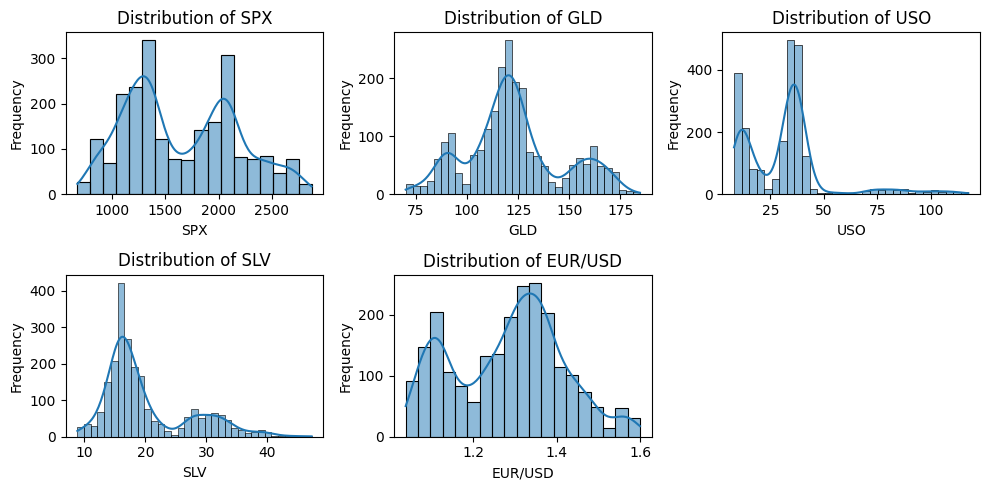

In [ ]:
plt.figure(figsize=(10, 5))

# Create a subplot for each column
for i, col in enumerate(data1.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check for outliners and Correlations

In [ ]:
for col in data1:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    count_outlier = ((data[col] > upper) | (data[col] < lower)).sum()
    total = data1.shape[0]
    percentage = int(count_outlier * 100 / total)
    print(f'Outliers in column {col} is: {percentage}%')

Outliers in column SPX is: 0%
Outliers in column GLD is: 5%
Outliers in column USO is: 5%
Outliers in column SLV is: 5%
Outliers in column EUR/USD is: 0%


In [ ]:
 correlation = data1.corr()
 correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

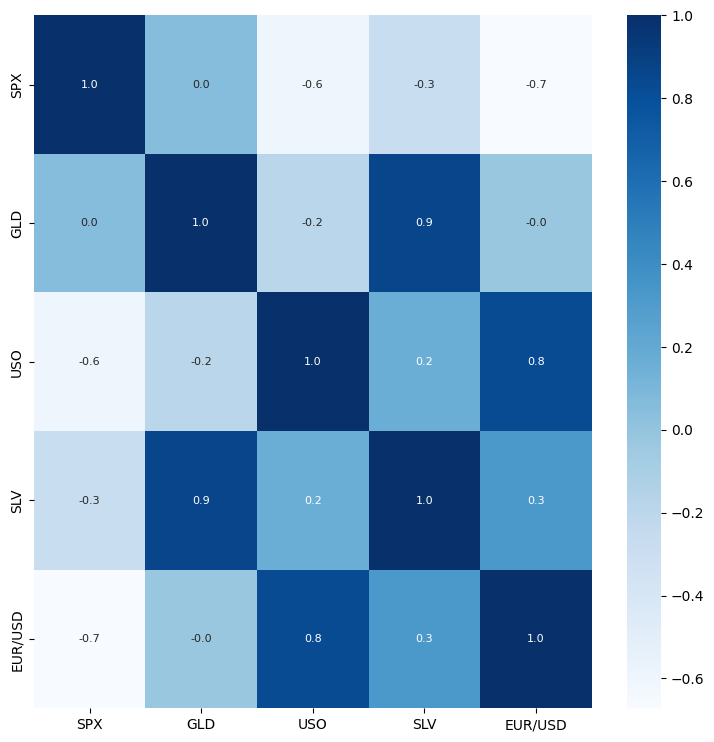

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation , cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Spliting Train and Test set

In [ ]:
X = data1.drop(columns=['GLD'],axis=1)
y = data1['GLD']

In [ ]:
X


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [ ]:
y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
X_train

,SPX,USO,SLV,EUR/USD
1018,1413.489990,36.220001,28.920000,1.253447
1870,2085.449951,11.740000,16.420000,1.132824
118,1245.359985,109.250000,18.545000,1.585590
220,805.219971,28.660000,11.090000,1.288494
2053,2328.949951,11.130000,17.530001,1.061639
...,...,...,...,...
1638,2095.840088,19.660000,15.480000,1.120787
1095,1426.189941,33.369999,29.370001,1.322769
1130,1502.420044,33.430000,27.730000,1.327316
1294,1807.229980,33.189999,18.959999,1.356779


In [ ]:
y_train

,GLD
1018,160.539993
1870,120.900002
118,94.440002
220,84.519997
2053,122.599998
...,...
1638,112.839996
1095,162.020004
1130,152.619995
1294,119.459999


# Train and Test the data with different algorithms

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Create a dictionary to store results
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2': [],
    'CV_Scores':[]
}

models = [
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XG Boost Regressor', XGBRegressor()),
    ('Extra Tree regressor', ExtraTreesRegressor())

]

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['CV_Scores'].append(cv_scores.mean())

# Create a DataFrame from the results dictionary
results_data = pd.DataFrame(results)

# Display the results
print(results_data)

                      Model       MAE       MSE      RMSE        R2  CV_Scores
0  Decision Tree Regression  1.520699  9.536901  3.088187  0.982606  -0.254986
1  Random Forest Regression  1.259266  5.306567  2.303599  0.990322  -0.282873
2        XG Boost Regressor  1.371213  6.266193  2.503236  0.988572  -0.291005
3      Extra Tree regressor  1.047125  3.189015  1.785781  0.994184  -0.315305


***As we can see Extra Tree Regressor has scored Highest accuracy of 99.418%***

# Hyperparameter Tuning using Random Search CV

In [ ]:
#Since from the above data we can see Extratreeregressor has the highest accuracy among others
#so we will find the best parammeters to increase its efficiency and accuracy
model1 =ExtraTreesRegressor()
param_grid = {
    'n_estimators': [42,50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


# Model Training using best Parameters on (ExtraTreeRegressor)

In [ ]:
etr =ExtraTreesRegressor(n_estimators=50,min_samples_split=2,min_samples_leaf= 1, random_state=1,max_depth=None)
etr.fit(X_train,y_train)
y_pred1= etr.predict(X_test)
y_pred1

array([122.65079982, 129.23060336, 128.6740014 ,  96.29959682,
       117.44260046, 114.68059908, 124.8670009 , 117.707399  ,
       108.2512012 ,  99.20779924,  96.81280066, 167.48799856,
       146.72880142, 117.01300058, 170.8248011 ,  85.65760112,
       122.77139874, 107.93019804, 113.12460012, 130.98480324,
       124.43579906, 113.7246018 , 116.3141999 , 108.64379966,
       110.00580196, 125.9865984 , 124.08040062, 113.48059812,
       113.2658018 , 125.742599  , 146.6470046 ,  89.80859994,
       166.93819994, 113.679999  , 112.6052002 , 120.26080098,
       141.6720007 , 160.78780066, 174.03379718, 152.81620114,
       117.91120012, 113.22900024, 121.25079984, 113.84720042,
       121.56960054, 107.98160066,  88.54239904, 114.69359878,
       129.3906017 , 117.97000124, 100.8547997 , 129.03560182,
       107.30579878, 159.99220226, 133.01340144, 116.94300014,
       147.51860034, 130.2852007 ,  95.47440134, 123.8498013 ,
       115.11939806,  86.09540012, 104.6203987 , 113.51

# Evaluation Metrics

In [ ]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)
cv_val = cross_val_score(etr, X, y, cv=5, scoring='r2')
print("ExtraTreeRegressor:")
print("RMSE=",rmse)
print("R2=",r2)
print("CV=",cv_val)
print("Accuracy of the Gold_Prediction model is :",r2*100,"%")


ExtraTreeRegressor:
RMSE= 1.609700974107064
R2= 0.9952742335963877
CV= [-3.31351111  0.65652253  0.82807897  0.56275905 -0.30799818]
Accuracy of the Gold_Prediction model is : 99.52742335963876 %


***Now The Accuracy has been increased to 99.527%***

# Compare the Actual values and Predicted Values via plot




In [ ]:
y_test = list(y_test)

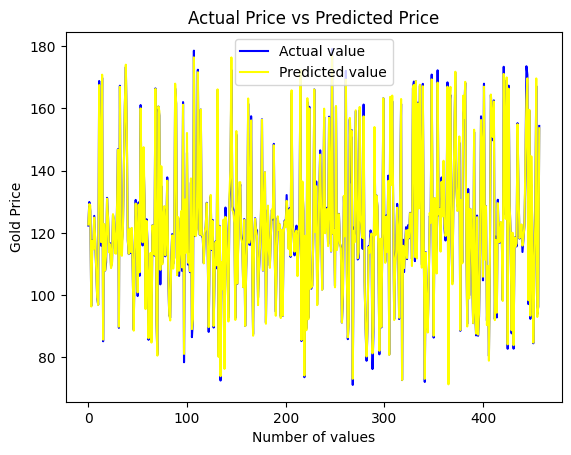

In [ ]:
plt.plot(y_test , color='blue' , label='Actual value')
plt.plot(y_pred1 , color='yellow' , label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()